# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# TASK #2: IMPORT LIBRARIES AND DATASETS

TYPES OF AVAILABLE SAGEMAKER IMAGES 
- Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.
- Base Python [python-3.6]
- MXNet (optimized for CPU) [mxnet-1.6-cpu-py36]
- MXNet (optimized for GPU) [mxnet-1.6-gpu-py36]
- PyTorch (optimized for CPU) [pytorch-1.4-cpu-py36]
- PyTorch (optimized for GPU) [pytorch-1.4-gpu-py36]
- TensorFlow (optimized for CPU) [tensorflow-1.15-cpu-py36]
- TensorFlow (optimized for GPU) [tensorflow-1.15-gpu-py36]
- TensorFlow 2 (optimized for CPU) [tensorflow-2.1-cpu-py36]
- TensorFlow 2 (optimized for GPU) [tensorflow-2.1-gpu-py36]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


MINI CHALLENGE
- Read the CSV file "insurance.csv" using pandas 
- Visualize the first and last 5 rows 

In [5]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS:

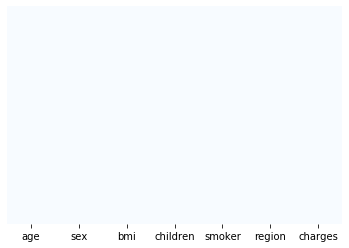

In [6]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [7]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Check the dataframe info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


MINI CHALLENGE
- Group data by 'age' and examine the relationship between 'age' and 'charges'


In [10]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [12]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Convert categorical variable to numerical 

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [18]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [19]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [21]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


MINI CHALLENGE
- Calculate the mean and standard deviation of the age, charges and bmi

# TASK #4: VISUALIZE DATASET

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f681b85bdd0>,
      dtype=object)

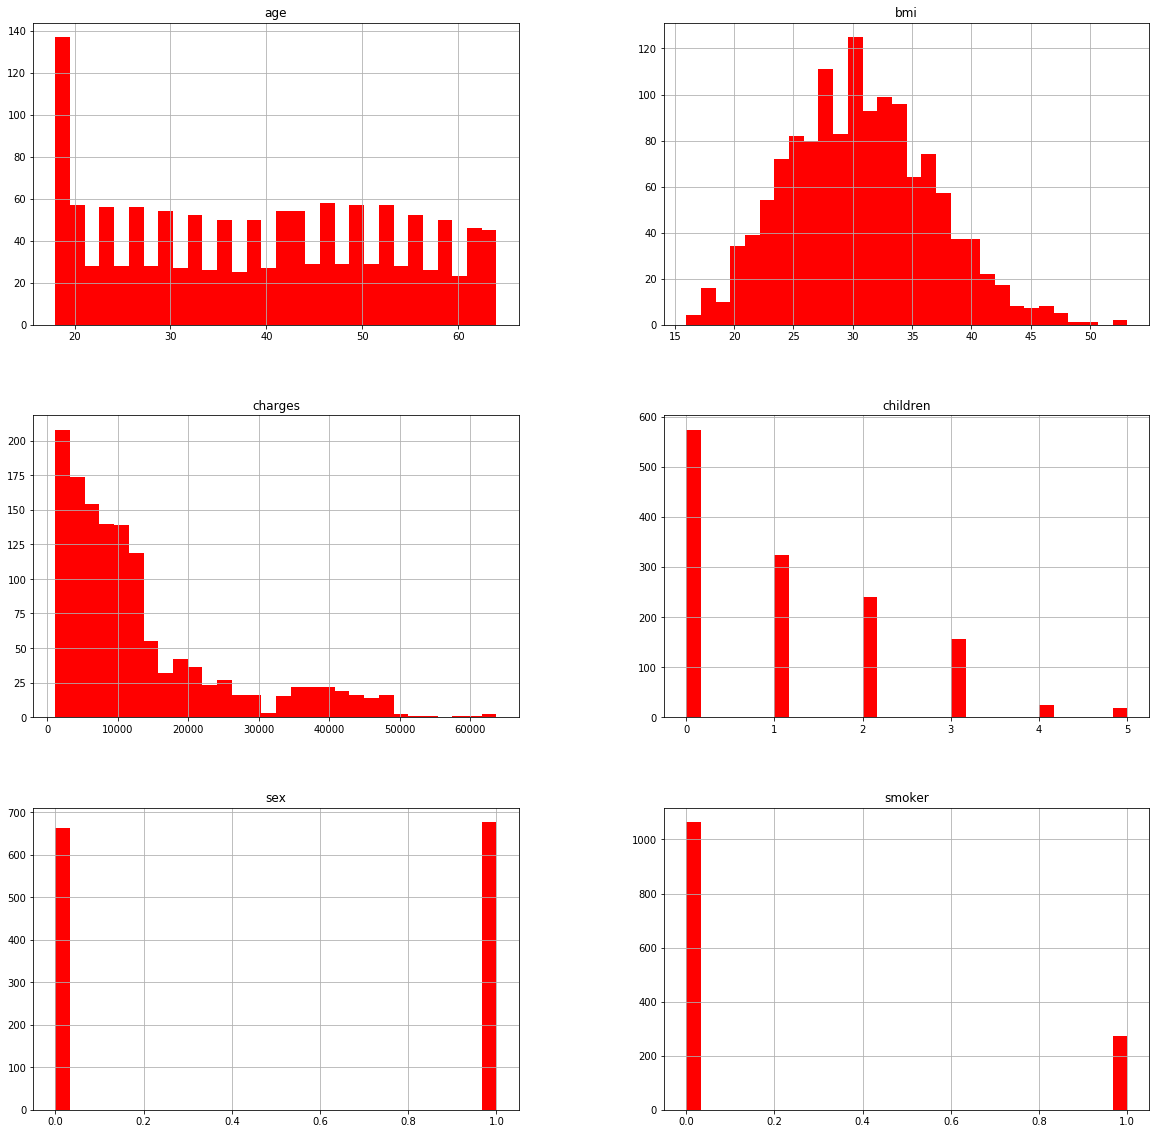

In [23]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')


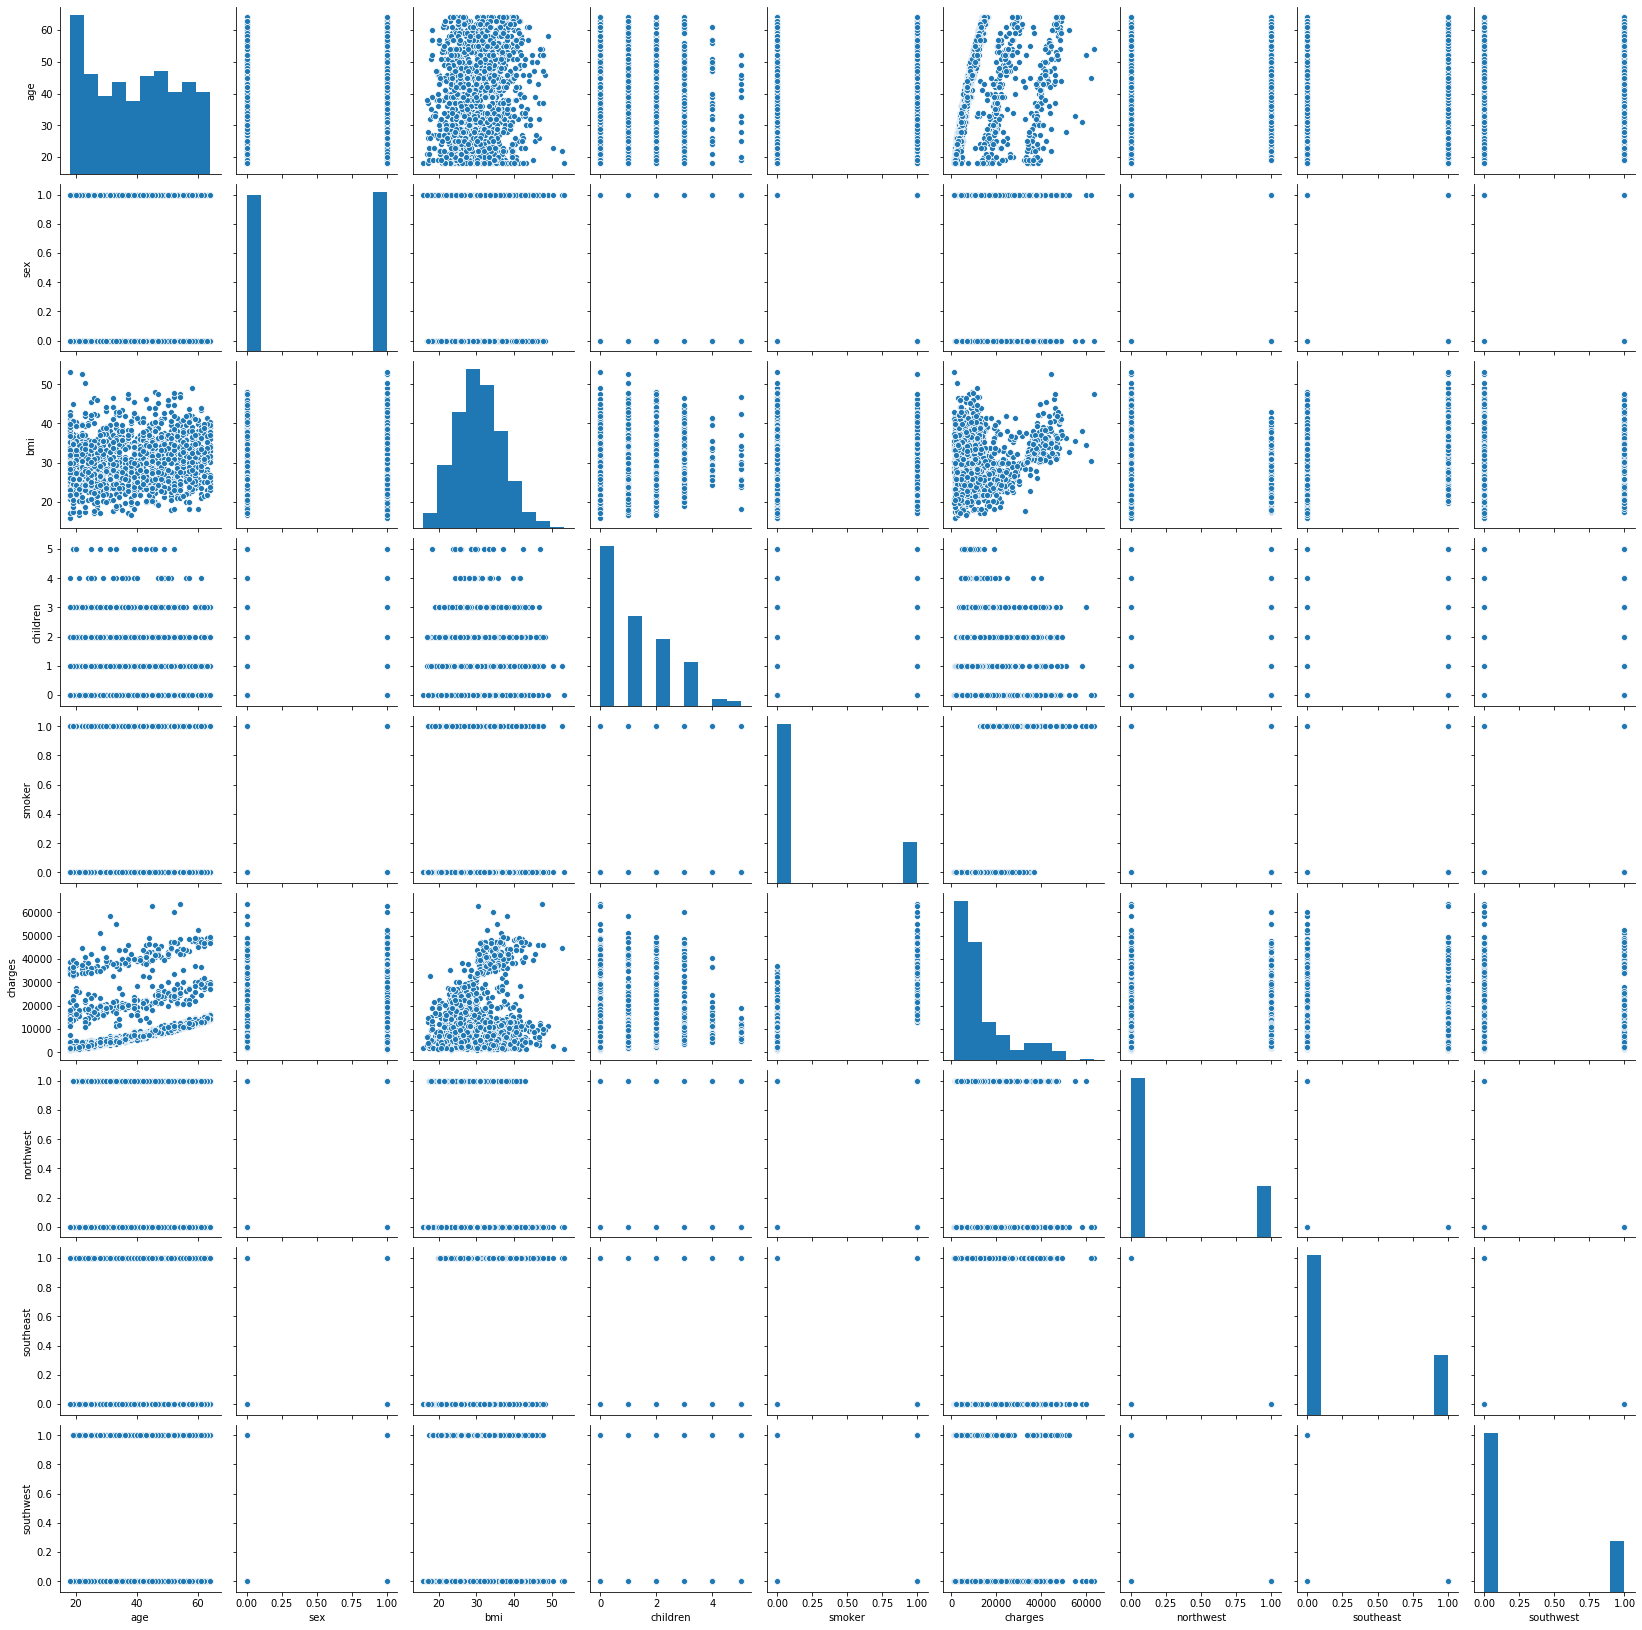

In [24]:
# plot pairplot

sns.pairplot(insurance_df)

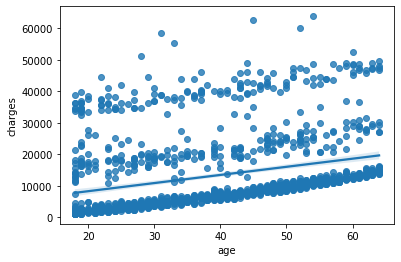

In [25]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

MINI CHALLENGE
- Obtain the regplot between bmi and charges


MINI CHALLENGE
 - Calculate and plot the correlation matrix
 - Which feature has the most positive correlation with charges?

In [26]:

# smoker and age have positive correlations with charges

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [27]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [28]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [29]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
X.shape

(1338, 8)

In [32]:
y.shape

(1338,)

In [33]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [34]:
y = y.reshape(-1,1)

In [35]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [36]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


MINI CHALLENGE
- Split the data into 20% Testing and 80% Training
- Double check that the split was successful by getting the shape of both the training and testing datasets

In [39]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# TASK #6: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [40]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7441995062423179

In [42]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [43]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [44]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

MINI CHALLENGE
- calculate the mean absolute error, R2 and adjusted R2

In [49]:
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n-k-1)

In [50]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6089.265 
MSE = 37079144.0 
MAE = 3972.603 
R2 = 0.7441995097679708 
Adjusted R2 = 0.7362983363245104


# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [51]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'pv-udemy-sagemaker-practical' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner_mll' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::874610315471:role/service-role/AmazonSageMaker-ExecutionRole-20201028T170930


In [52]:
X_train.shape

(1070, 8)

In [53]:
y_train.shape

(1070, 1)

In [58]:
y_train = y_train[:,0]

In [59]:
y_train.shape

(1070,)

In [60]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [61]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://pv-udemy-sagemaker-practical/linear_learner_mll/train/linear-train-data


In [62]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://pv-udemy-sagemaker-practical/linear_learner_mll/output


In [63]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [64]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances = True,
                                       train_max_run = 300,
                                       train_max_wait = 600)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-10-28 19:12:13 Starting - Starting the training job...
2020-10-28 19:12:17 Starting - Launching requested ML instances......
2020-10-28 19:13:22 Starting - Insufficient capacity error from EC2 while launching instances, retrying!...
2020-10-28 19:14:10 Starting - Preparing the instances for training......
2020-10-28 19:15:12 Downloading - Downloading input data
2020-10-28 19:15:12 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/28/2020 19:15:53 INFO 140353185830720] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'

MINI CHALLENGE
 - retrain the linear learner model using more epochs, more number of models. 
 - Experiment with a different loss function and report any improvement or degradation in results.

### https://sagemaker.readthedocs.io/en/stable/algorithms/linear_learner.html

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [65]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                 content_type='text/csv',
                                instance_type = 'ml.m4.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


---------------!

In [66]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [67]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [68]:
result # results are in Json format

{'predictions': [{'score': -0.6986030340194702},
  {'score': -0.6904517412185669},
  {'score': -1.0195772647857666},
  {'score': -0.6101903319358826},
  {'score': -0.1864451915025711},
  {'score': -0.9079487323760986},
  {'score': 2.6685502529144287},
  {'score': -0.1567598283290863},
  {'score': 2.4494926929473877},
  {'score': -0.33956241607666016},
  {'score': -0.38379597663879395},
  {'score': -1.0284173488616943},
  {'score': -0.14935185015201569},
  {'score': -0.6553008556365967},
  {'score': -0.7523415088653564},
  {'score': -0.018392864614725113},
  {'score': -0.739780068397522},
  {'score': -0.1433085948228836},
  {'score': 1.91036057472229},
  {'score': -0.14975203573703766},
  {'score': -0.9015800952911377},
  {'score': -0.7134027481079102},
  {'score': 2.1832613945007324},
  {'score': -0.7063035368919373},
  {'score': -0.9012665748596191},
  {'score': -0.6975018382072449},
  {'score': -0.6058253645896912},
  {'score': 1.7318717241287231},
  {'score': 2.3352315425872803},
  

In [69]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [70]:
predictions

array([-0.69860303, -0.69045174, -1.01957726, -0.61019033, -0.18644519,
       -0.90794873,  2.66855025, -0.15675983,  2.44949269, -0.33956242,
       -0.38379598, -1.02841735, -0.14935185, -0.65530086, -0.75234151,
       -0.01839286, -0.73978007, -0.14330859,  1.91036057, -0.14975204,
       -0.9015801 , -0.71340275,  2.18326139, -0.70630354, -0.90126657,
       -0.69750184, -0.60582536,  1.73187172,  2.33523154, -0.56721818,
        1.86899841, -0.40368986, -0.31862211, -0.46941572, -0.65806359,
        2.15014362, -1.07089508, -0.4994238 , -0.21191582, -0.73711711,
       -0.11328246, -0.05007811, -0.2169061 ,  2.49682093,  2.26851463,
       -0.38134068, -0.39153761, -0.26153868, -1.02609885, -0.26017785,
       -0.30475593,  0.02489437,  1.91487741, -0.51264381, -0.44922835,
       -0.72356814, -0.1499055 , -0.77474993, -0.32919741, -0.58608204,
       -0.88932872, -0.90587455,  0.01653905, -0.77756506, -0.42675602,
       -0.38664103, -0.75741887, -0.24037366, -0.53942174,  2.22

In [71]:
predictions.shape

(268,)

In [72]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6379.581 
MSE = 40699049.79474263 
MAE = 3017.3173698309497 
R2 = 0.7192265925139933 
Adjusted R2 = 0.7105540548310278


In [74]:
# Delete the end-point

linear_regressor.delete_endpoint()

# TASK #9: LET'S TRY A MORE COMPLEX ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [75]:
!pip install tensorflow

     |████████████████████████████████| 320.4 MB 5.6 kB/s  eta 0:00:01        | 231.1 MB 67.1 MB/s eta 0:00:02     |████████████████████████████▌   | 285.7 MB 82.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 215 kB/s  eta 0:00:01
     |████████████████████████████████| 127 kB 70.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 50.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 110 kB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 605 kB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 67.9 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-non

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [77]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [78]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6251 - val_loss: 0.2831
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.3560 - val_loss: 0.2371
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2820 - val_loss: 0.2332
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2464 - val_loss: 0.2123
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2333 - val_loss: 0.2504
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2305 - val_loss: 0.2275
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2341 - val_loss: 0.2367
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2139 - val_loss: 0.2394
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2550
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2102 - val_loss: 0.2186
Epoch 11/

In [79]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.1773
Accuracy : 0.8227383494377136


In [80]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

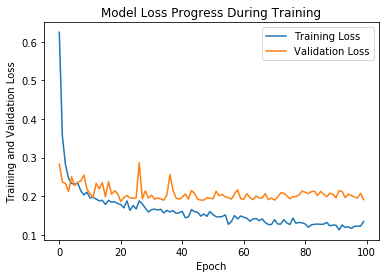

In [81]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

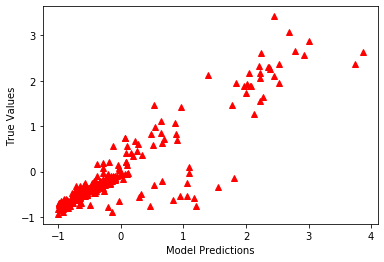

In [82]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [83]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

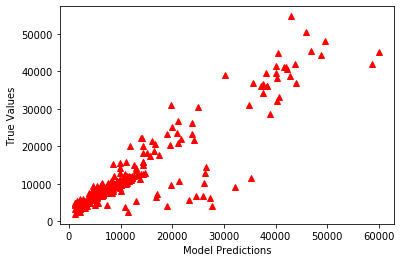

In [84]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [85]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5096.706 
MSE = 25976412.0 
MAE = 3011.5188 
R2 = 0.8207946940334111 
Adjusted R2 = 0.8152593950074161


MINI CHALLENGE
- Experiment with a deeper network with more neurons in the hidden layer
- Experiment with no regularization (dropout)